In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import collections
import re

import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
# Reading the Dataset
df_purchase = pd.read_csv(r'QVI_purchase_behaviour.csv')
df_transaction = pd.read_excel(r'QVI_transaction_data.xlsx')

In [3]:
df_purchase.head()

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

In [4]:
df_transaction.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

### Exploratory Data Analysis - EDA

In [5]:
# Checking the dimension of the dataset
df_purchase.shape

(72637, 3)

In [6]:
# Checking for null values in the dataset
df_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df_purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [9]:
df_purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

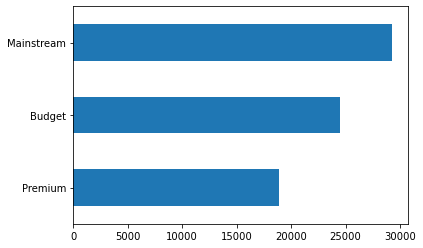

In [10]:
df_purchase['PREMIUM_CUSTOMER'].value_counts().sort_values().plot(kind='barh')

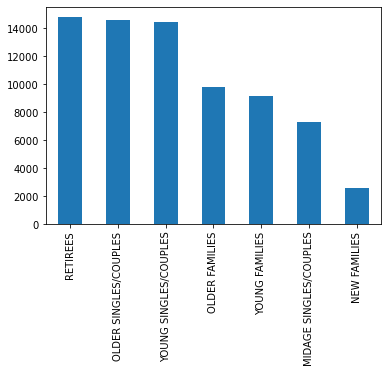

In [11]:
df_purchase['LIFESTAGE'].value_counts().sort_values(ascending = False).plot(kind='bar')

In [12]:
df_transaction.shape

(264836, 8)

In [13]:
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [14]:
df_transaction.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [15]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [16]:
# Converting Date from int to date format
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], unit = 'D', origin = '1899-12-30')
df_transaction.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8

In [17]:
# Extracting the Brand name from Prod_Name
df_transaction['BRAND_NAME'] = df_transaction['PROD_NAME'].str.extract('([A-Za-z]+)')

In [18]:
# Extracting Pack Size from Prod_name
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract('([0-9]+)').astype('int')
df_transaction.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES BRAND_NAME  \
0    Natural Chip        Compny SeaSalt175g         2        6.0    Natural   
1                  CCs Nacho Cheese    175g         3        6.3        CCs   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9     Smiths   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0     Smiths   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8     Kettle   

   PACK_SIZE  
0        175  
1        175  
2        170  
3        175  
4        150

In [19]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   BRAND_NAME      264836 non-null  object        
 9   PACK_SIZE       264836 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(2)
memory usage: 19.2+ MB


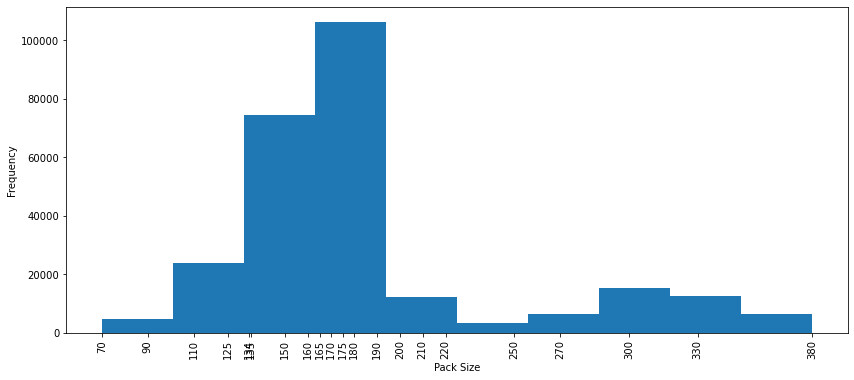

In [20]:
fig, ax = plt.subplots(figsize=(14,6))
plt.hist(df_transaction['PACK_SIZE'])
plt.xticks(df_transaction['PACK_SIZE'].unique(), rotation = 90)
ax.set_xlabel('Pack Size')
ax.set_ylabel('Frequency')
plt.show()

In [21]:
df_transaction['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [22]:
# Changing brand name Burger to Smiths, since Burger rings are Smiths Brand Chips
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Burger')] = 'Smiths'

In [23]:
# Changing NCC to Natural, since NCC is Natual Chips company
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'NCC')] = 'Natural'

In [24]:
# Changing Infzns to Infuzions
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Infzns')] = 'Infuzions'

In [25]:
# Dorito to Doritos
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Dorito')] = 'Doritos'

In [26]:
# Smith to Smiths
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Smith')] = 'Smiths'

In [27]:
# Snbts to Sunbites
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Snbts')] = 'Sunbites'

In [28]:
# Red to RRD
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Red')] = 'RRD'

In [29]:
# Grain and GrnWves to Sunbites
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'Grain')] = 'Sunbites'
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'GrnWves')] = 'Sunbites'

In [30]:
# French and WW to Woolworths
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'French')] = 'Woolworths'
df_transaction['BRAND_NAME'][(df_transaction['BRAND_NAME']== 'WW')] = 'Woolworths'

In [31]:
df_transaction['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Sunbites', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Cheezels', 'Infuzions', 'RRD',
       'Pringles', 'Tyrrells', 'Cobs', 'Tostitos', 'Cheetos'],
      dtype=object)

In [32]:
df_transaction['PROD_NAME'].str.split()[0]

['Natural', 'Chip', 'Compny', 'SeaSalt175g']

In [33]:
prod_ = np.array_split(df_transaction['PROD_NAME'].unique(), len(df_transaction['PROD_NAME'].unique()))

In [34]:
prod_list = [prod.tolist() for prod in prod_]

In [35]:
prod_split = [prod[0].split() for prod in prod_list]
prod_words = sum(prod_split,[])

In [36]:
prod_words = [word for word in prod_words if re.search('(^[A-Za-z])', word) and not re.search('([0-9])', word)]

In [37]:
counter = collections.Counter(prod_words)
pd.DataFrame.from_dict(data = counter, orient='index').reset_index().rename(columns={'index':'word',0:'count'}).sort_values(by='count', ascending=False)

word  count
9         Chips     21
6        Smiths     16
7       Crinkle     14
8           Cut     14
13       Kettle     13
..          ...    ...
88        Basil      1
87   Mozzarella      1
86        Roast      1
84          Chp      1
185   Bolognese      1

[186 rows x 2 columns]

In [38]:
# Dropping Salsa Products 
df_transaction.drop(index = df_transaction[df_transaction['PROD_NAME'].str.find('Salsa') != -1].index, inplace = True)

In [39]:
df_transaction.describe()

STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  246742.000000    2.467420e+05  2.467420e+05  246742.000000   
mean      135.051098    1.355310e+05  1.351311e+05      56.351789   
std        76.787096    8.071528e+04  7.814772e+04      33.695428   
min         1.000000    1.000000e+03  1.000000e+00       1.000000   
25%        70.000000    7.001500e+04  6.756925e+04      26.000000   
50%       130.000000    1.303670e+05  1.351830e+05      53.000000   
75%       203.000000    2.030840e+05  2.026538e+05      87.000000   
max       272.000000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES      PACK_SIZE  
count  246742.000000  246742.000000  246742.000000  
mean        1.908062       7.321322     175.585178  
std         0.659831       3.077828      59.434727  
min         1.000000       1.700000      70.000000  
25%         2.000000       5.800000     150.000000  
50%         2.000000       7.400000     170.000000  
75%         2.000000       8.800000     175.000000  
max       200.000000     650.000000     380.000000

In [40]:
# There seems to be outlier where 200 chips packets are bought at once
df_transaction[df_transaction['PROD_QTY'] == 200]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES BRAND_NAME  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0    Doritos   
69763  Dorito Corn Chp     Supreme 380g       200      650.0    Doritos   

       PACK_SIZE  
69762        380  
69763        380

In [41]:
df_transaction[df_transaction['LYLTY_CARD_NBR'] == 226000]

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES BRAND_NAME  \
69762  Dorito Corn Chp     Supreme 380g       200      650.0    Doritos   
69763  Dorito Corn Chp     Supreme 380g       200      650.0    Doritos   

       PACK_SIZE  
69762        380  
69763        380

In [42]:
# Let's remove this outlier based upon the loyalty card number
df_transaction.drop(index = df_transaction[df_transaction['LYLTY_CARD_NBR'] == 226000].index, inplace = True)

In [43]:
# Let's drop loyalty card number from df_purchase as well, as we don't have any other purchases from this customer
df_purchase.drop(index = df_purchase[df_purchase['LYLTY_CARD_NBR'] == 226000].index, inplace = True)

In [44]:
df_transaction.describe()

STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  246740.000000    2.467400e+05  2.467400e+05  246740.000000   
mean      135.050361    1.355303e+05  1.351304e+05      56.352213   
std        76.786971    8.071520e+04  7.814760e+04      33.695235   
min         1.000000    1.000000e+03  1.000000e+00       1.000000   
25%        70.000000    7.001500e+04  6.756875e+04      26.000000   
50%       130.000000    1.303670e+05  1.351815e+05      53.000000   
75%       203.000000    2.030832e+05  2.026522e+05      87.000000   
max       272.000000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES      PACK_SIZE  
count  246740.000000  246740.000000  246740.000000  
mean        1.906456       7.316113     175.583521  
std         0.342499       2.474897      59.432118  
min         1.000000       1.700000      70.000000  
25%         2.000000       5.800000     150.000000  
50%         2.000000       7.400000     170.000000  
75%         2.000000       8.800000     175.000000  
max         5.000000      29.500000     380.000000

In [45]:
# Total Sales by Day
df_SalesbyDate = df_transaction[['DATE','TOT_SALES']].groupby(['DATE']).sum().reset_index()
Date = pd.DataFrame(pd.date_range(start='2018-07-01', end='2019-06-30')).rename({0:'DATE'}, axis = 1)
df_SalesbyDate = Date.merge(df_SalesbyDate, how='left',on='DATE')

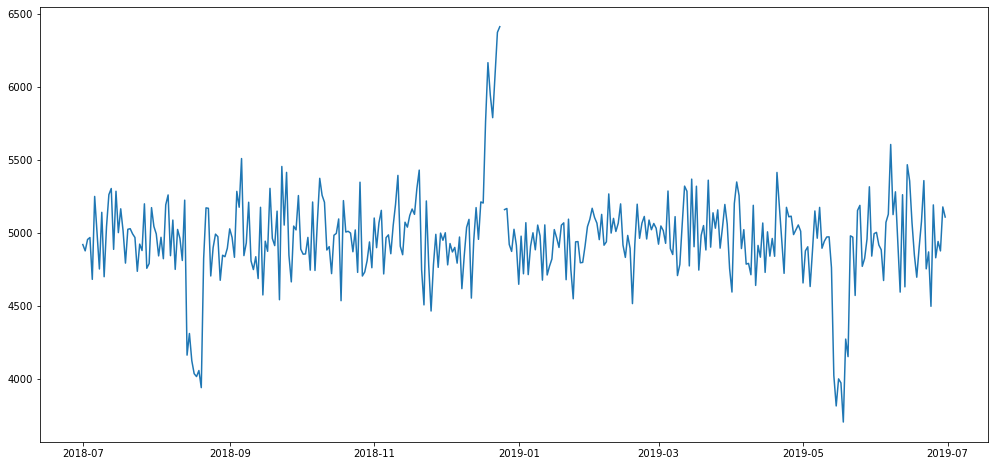

In [46]:
plt.figure(figsize=(17,8))
plt.plot(df_SalesbyDate['DATE'], df_SalesbyDate['TOT_SALES'])
plt.show()

In [47]:
# There is missing sales value for a date in Decemeber, let's zoom in December
December = df_SalesbyDate[(df_SalesbyDate['DATE'] >= '2018-12-01') & (df_SalesbyDate['DATE'] <= '2018-12-31')]
December.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 153 to 183
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       31 non-null     datetime64[ns]
 1   TOT_SALES  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 744.0 bytes


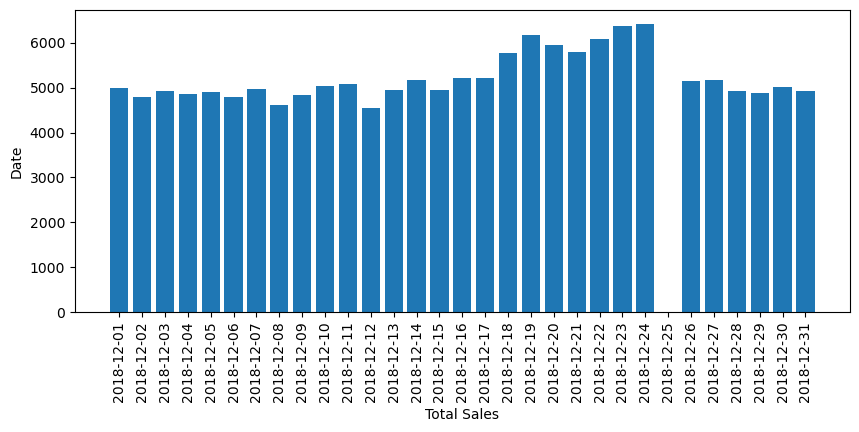

In [48]:
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax.bar(December['DATE'],December['TOT_SALES'])
plt.xticks(December['DATE'], rotation=90)
ax.set_ylabel('Date')
ax.set_xlabel('Total Sales')
plt.show()

In [49]:
# There is increase in sales near Christmas eve time but no sales on Christmas day, might have been a holiday.

In [50]:
# Merging the dataframes
df = df_transaction.merge(right=df_purchase,how='inner',on='LYLTY_CARD_NBR' )
df.head()

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2018-11-10          1            1307     346        96   
3 2019-03-09          1            1307     347        54   
4 2019-05-20          1            1343     383        61   

                                PROD_NAME  PROD_QTY  TOT_SALES  BRAND_NAME  \
0  Natural Chip        Compny SeaSalt175g         2        6.0     Natural   
1                CCs Nacho Cheese    175g         3        6.3         CCs   
2          WW Original Stacked Chips 160g         2        3.8  Woolworths   
3                       CCs Original 175g         1        2.1         CCs   
4  Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      Smiths   

   PACK_SIZE               LIFESTAGE PREMIUM_CUSTOMER  
0        175   YOUNG SINGLES/COUPLES          Premium  
1        175  MIDAGE SINGLES/COUPLES           Budget  
2        160  MIDAGE SINGLES/COUPLES           Budget  
3        175  MIDAGE SINGLES/COUPLES           Budget  
4        170  MIDAGE SINGLES/COUPLES           Budget

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   BRAND_NAME        246740 non-null  object        
 9   PACK_SIZE         246740 non-null  int32         
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 23.5+ MB


In [52]:
# Converting the Clean dataframe to csv file for Analysis
# df.to_csv('Clean_QV_Data.csv', index=False)

### Data Analysis

In [55]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'BRAND_NAME', 'PACK_SIZE',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [72]:
# Calculating total sales by Lifestage of Customer
SalesbyLifestage = pd.pivot_table(df, index = 'LIFESTAGE', values = 'TOT_SALES', aggfunc = np.sum).sort_values(by='TOT_SALES', ascending = False)
SalesbyLifestage = SalesbyLifestage.reset_index()

AttributeError: 'Rectangle' object has no property 'size'

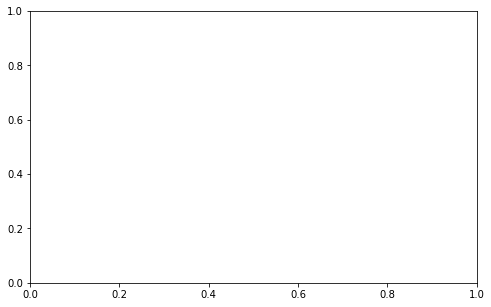

In [140]:
# Total Sales by Lifestage of Customer
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data = SalesbyLifestage, x = 'LIFESTAGE', y = 'TOT_SALES', hue = df['PREMIUM_CUSTOMER'], size = 'TOT_SALES')
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.show()

In [132]:
# Total Sales by Product
SalesbyProduct = pd.pivot_table(df, index = 'PROD_NAME', values = 'TOT_SALES', aggfunc = np.sum).sort_values(by='TOT_SALES', ascending = False)
SalesbyProduct = SalesbyProduct.reset_index()
SalesbyProduct

PROD_NAME  TOT_SALES
0            Dorito Corn Chp     Supreme 380g    39052.0
1      Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2    Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
3      Kettle Mozzarella   Basil & Pesto 175g    34457.4
4           Smiths Crinkle      Original 330g    34302.6
..                                        ...        ...
100            Woolworths Cheese   Rings 190g     5169.6
101      Snbts Whlgrn Crisps Cheddr&Mstrd 90g     5076.2
102          WW Crinkle Cut      Chicken 175g     4702.2
103  Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
104         WW Crinkle Cut      Original 175g     4532.2

[105 rows x 2 columns]

In [133]:
# Total Sales by Month

SalesbyMonth = pd.pivot_table(df.sort_values(by= 'DATE'), index = [df['DATE'].dt.month_name()], values = 'TOT_SALES', aggfunc = np.sum)
SalesbyMonth = SalesbyMonth.reset_index().rename({'DATE':'MONTH'}, axis = 1)
SalesbyMonth

MONTH  TOT_SALES
0       April  149374.20
1      August  147422.05
2    December  156461.60
3    February  140480.00
4     January  151593.80
5        July  154514.50
6        June  150135.90
7       March  155772.80
8         May  146300.35
9    November  149609.50
10    October  153454.10
11  September  150058.90

In [134]:
df.sort_values(by= 'DATE')

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
17882  2018-07-01         39           39077   35094       104   
148290 2018-07-01         80           80003   78303        99   
57524  2018-07-01         93           93176   91792        27   
244049 2018-07-01        125          125227  129193         4   
197517 2018-07-01        147          147123  146450        27   
...           ...        ...             ...     ...       ...   
57847  2019-06-30        100          100190   99666        10   
124006 2019-06-30        230          230102  232603        52   
227722 2019-06-30         58           58097   53258        16   
184974 2019-06-30        174          174108  175125        93   
12120  2019-06-30        165          165031  165555       109   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
17882   Infuzions Thai SweetChili PotatoMix 110g         2        7.6   
148290          Pringles Sthrn FriedChicken 134g         2        7.4   
57524        WW Supreme Cheese   Corn Chips 200g         2        3.8   
244049          Dorito Corn Chp     Supreme 380g         2       13.0   
197517       WW Supreme Cheese   Corn Chips 200g         2        3.8   
...                                          ...       ...        ...   
57847        RRD SR Slow Rst     Pork Belly 150g         2        5.4   
124006     Grain Waves Sour    Cream&Chives 210G         2        7.2   
227722  Smiths Crinkle Chips Salt & Vinegar 330g         2       11.4   
184974   Doritos Corn Chip Southern Chicken 150g         2        7.8   
12120                   Pringles Barbeque   134g         2        7.4   

        BRAND_NAME  PACK_SIZE               LIFESTAGE PREMIUM_CUSTOMER  
17882    Infuzions        110  MIDAGE SINGLES/COUPLES          Premium  
148290    Pringles        134                RETIREES       Mainstream  
57524   Woolworths        200          OLDER FAMILIES       Mainstream  
244049     Doritos        380   YOUNG SINGLES/COUPLES          Premium  
197517  Woolworths        200          YOUNG FAMILIES       Mainstream  
...            ...        ...                     ...              ...  
57847          RRD        150          OLDER FAMILIES       Mainstream  
124006    Sunbites        210   OLDER SINGLES/COUPLES          Premium  
227722      Smiths        330   YOUNG SINGLES/COUPLES       Mainstream  
184974     Doritos        150          YOUNG FAMILIES           Budget  
12120     Pringles        134  MIDAGE SINGLES/COUPLES       Mainstream  

[246740 rows x 12 columns]

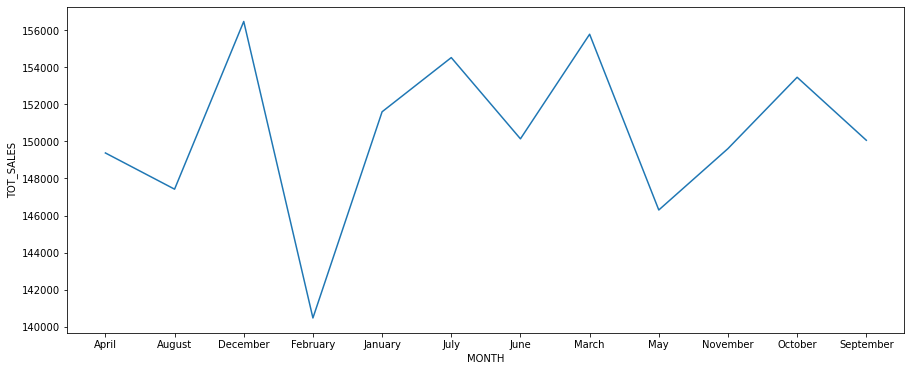

In [127]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(data = SalesbyMonth, x = 'MONTH' , y = 'TOT_SALES')
plt.show()